# Animal classification

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Importing dataset

In [2]:
df = pd.read_csv('zoo.csv')
df.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


### Exctracting features list from dataset

In [3]:
features = list(df.columns)
features.remove('animal_name')
features.remove('class_type')
print(features)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [4]:
Xin = df[features].values.astype(np.float32)
Yin = df['class_type']
print('Features shape:',Xin.shape)
print('Label shape:', Yin.shape)

Features shape: (101, 16)
Label shape: (101,)


### Splitting dataset

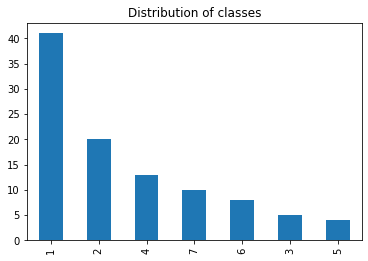

In [5]:
df['class_type'].value_counts().plot(kind='bar', title='Distribution of classes')

Dataset is not distributed equally for each class.
Stratified splitting (to keep the distribution equal for both test and train parts) of dataset into testing and training parts:

In [6]:
Split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
X = Xin
Y = Yin.values

for train_index, test_index in Split.split(X,Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

print('X_train shape: ',X_train.shape)
print('X_test shape:',X_test.shape)
print('Y_train shape:',Y_train.shape)
print('Y_test shape:',Y_test.shape)

X_train shape:  (70, 16)
X_test shape: (31, 16)
Y_train shape: (70,)
Y_test shape: (31,)


In [7]:
X_train = pd.DataFrame(X_train, columns = features)
X_test = pd.DataFrame(X_test, columns = features)
Y_train = pd.DataFrame(Y_train, columns = ['class_type'])
Y_test = pd.DataFrame(Y_test, columns = ['class_type'])

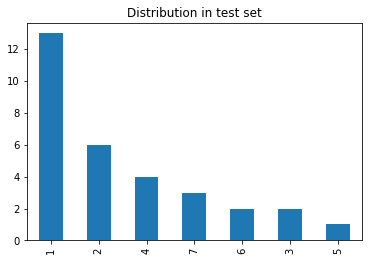

In [8]:
Y_test['class_type'].value_counts().plot(kind='bar', title='Distribution in test set')

### Training Decision Tree classifier

In [9]:
Model = DecisionTreeClassifier()
Model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Accuracy and classification report of classifier

In [10]:
y_pred = Model.predict(X_test)
print("Testing accuracy :", Model.score(X_test, Y_test))
print("Classification report: \n", classification_report(Y_test, y_pred))

Testing accuracy : 0.967741935483871
Classification report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         3

    accuracy                           0.97        31
   macro avg       0.96      0.93      0.93        31
weighted avg       0.98      0.97      0.96        31



### Confusion Matrix

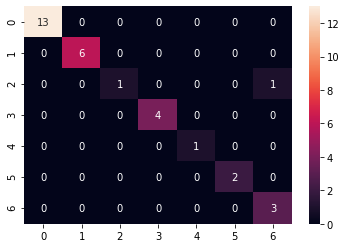

In [11]:
matrix = confusion_matrix(Y_test, y_pred)
plot = sns.heatmap(matrix, annot=True)

## Decision Tree Visualization

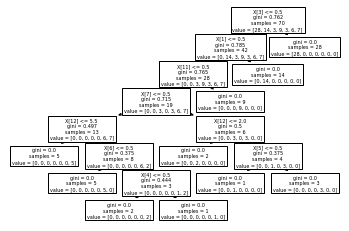

In [12]:
tree.plot_tree(Model);